Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import joblib
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Data Collection and Processing

In [2]:
df=pd.read_csv("customer_churn_data.csv")

In [3]:
df.head() #df.head(10) means 10 rows

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [ ]:
df.isna().sum().sum()

297

In [6]:
df["InternetService"]=df["InternetService"].fillna("") 

In [7]:
df.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [8]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [11]:
numeric_columns_data=df.select_dtypes(include=["number"])

In [12]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [13]:
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,,4465.56,No,Yes


Data Visualization

In [85]:
import matplotlib.pyplot as plt

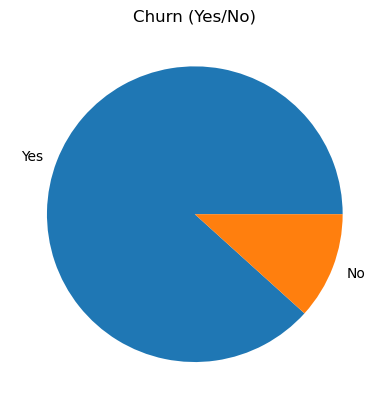

In [15]:
df["Churn"].value_counts().plot(kind="pie")
plt.title("Churn (Yes/No)")
plt.ylabel("")
plt.show()

In [16]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [17]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [18]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [19]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [20]:
df.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

we can see that as the duration increases the monthly charge decreases

Text(0.5, 1.0, 'contract Type Average Price')

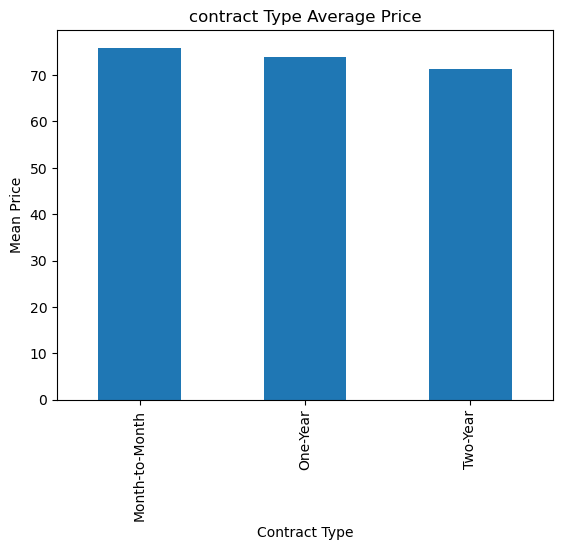

In [21]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Mean Price")
plt.xlabel("Contract Type")
plt.title("contract Type Average Price")

In [22]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


Text(0.5, 1.0, 'Histogram of Monthly Charges')

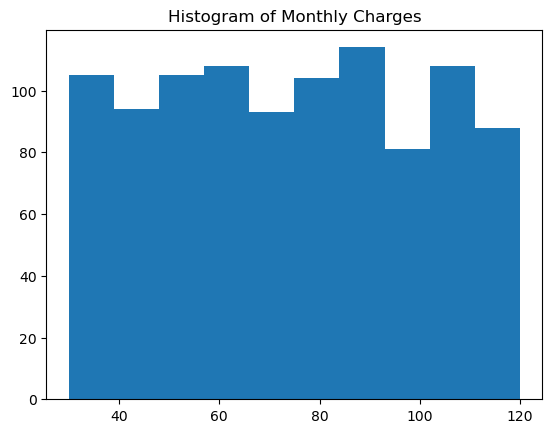

In [23]:
plt.hist(df["MonthlyCharges"])
plt.title("Histogram of Monthly Charges")

In [24]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [25]:
df.head(1)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes


In [26]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [27]:
Y=df[["Churn"]]
X=df[["Age","Gender","Tenure","MonthlyCharges","TechSupport"]]

In [28]:
Y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [29]:
X.head(1)

,Age,Gender,Tenure,MonthlyCharges,TechSupport
0,49,Male,4,88.35,Yes


In [30]:
X["Gender"]=X["Gender"].apply(lambda x:1 if x=="Female" else 0)

C:\Users\singa\AppData\Local\Temp\ipykernel_11504\59549676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Gender"]=X["Gender"].apply(lambda x:1 if x=="Female" else 0)


In [31]:
X["TechSupport"]=X["TechSupport"].apply(lambda x:1 if x=="Yes" else 0)

C:\Users\singa\AppData\Local\Temp\ipykernel_11504\2303953364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["TechSupport"]=X["TechSupport"].apply(lambda x:1 if x=="Yes" else 0)


In [32]:
X

,Age,Gender,Tenure,MonthlyCharges,TechSupport
0,49,0,4,88.35,1
1,43,0,0,36.67,1
2,51,1,2,63.79,0
3,60,1,8,102.34,1
4,42,0,32,69.01,0
...,...,...,...,...,...
995,42,0,41,37.14,1
996,62,0,9,80.93,0
997,51,1,15,111.72,1
998,39,0,68,65.67,0


In [33]:
Y["Churn"]=Y["Churn"].apply(lambda x:1 if x=="Yes" else 0)

C:\Users\singa\AppData\Local\Temp\ipykernel_11504\3100944883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y["Churn"]=Y["Churn"].apply(lambda x:1 if x=="Yes" else 0)


In [34]:
Y.head(2)

,Churn
0,1
1,1


Splitting of Data

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 )

In [36]:
X.describe()

,Age,Gender,Tenure,MonthlyCharges,TechSupport
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,44.674000,0.538000,18.97300,74.391290,0.506000
std,9.797741,0.498803,18.89257,25.712083,0.500214
min,12.000000,0.000000,0.00000,30.000000,0.000000
25%,38.000000,0.000000,5.00000,52.357500,0.000000
50%,45.000000,1.000000,13.00000,74.060000,1.000000
75%,51.000000,1.000000,26.00000,96.102500,1.000000
max,83.000000,1.000000,122.00000,119.960000,1.000000


In [37]:
from sklearn.preprocessing import StandardScaler 

In [38]:
scaler=StandardScaler()

In [39]:
X_train=scaler.fit_transform(X_train)

In [40]:
import joblib
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [41]:
X_test=scaler.fit_transform(X_test)

In [42]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
    print("Accuracy score of the model is {}".format(accuracy_score(Y_test,predictions)))

In [43]:
from sklearn.model_selection import GridSearchCV #for hyper parameter tuning

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
log_model=LogisticRegression()

In [46]:
import warnings
warnings.filterwarnings("ignore")

In [47]:
log_model.fit(X_train,Y_train)

LogisticRegression()

In [48]:
X.head(1)

,Age,Gender,Tenure,MonthlyCharges,TechSupport
0,49,0,4,88.35,1


In [49]:
log_model.predict([[49,0,4,88,1]])[0]

1

In [50]:
y_predictions=log_model.predict(X_test)

In [51]:
modelperformance(y_predictions)

Accuracy score of the model is 0.905


In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
param_grid={
    "n_neighbors": [3,5,7,9],
    "weights" : ["uniform","distance"]     #uniform means all dps have same effect whereas distance means long dist points have inverse effect on prediction
}

In [54]:
gridkn=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

In [55]:
gridkn.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [56]:
gridkn.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [57]:
y_pred=gridkn.predict(X_test)

In [58]:
modelperformance(y_pred)

Accuracy score of the model is 0.9


In [59]:
from sklearn.svm import SVC

In [60]:
svm=SVC()

In [61]:
param_grid={
    "C" : [0.01,0.1,0.5,1],
    "kernel" : ["linear",'rbf',"poly"]
}

In [62]:
gridsvc=GridSearchCV(svm,param_grid,cv=5)

In [63]:
gridsvc.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [64]:
gridsvc.best_params_

{'C': 1, 'kernel': 'rbf'}

In [65]:
y_pred=gridsvc.predict(X_test)

In [66]:
modelperformance(y_pred)

Accuracy score of the model is 0.91


In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
param_grid= {
    "criterion" : ["gini","entropy"],
    "splitter" : ["best","random"],
    "max_depth" : [None,10,20,30],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4]
}

In [69]:
griddtc=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)

In [70]:
griddtc.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [71]:
griddtc.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'random'}

In [72]:
y_pred=griddtc.predict(X_test)

In [73]:
modelperformance(y_pred)

Accuracy score of the model is 0.905


In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rfc=RandomForestClassifier()

In [76]:
param_grid = {
    "n_estimators" : [32,64,128,256],  #no.of trees
    "max_features" : [2,3,4],
    "bootstrap" : [True,False]         #true means use with replacement
}

In [77]:
grid_rfc=GridSearchCV(rfc,param_grid, cv=5)

In [78]:
grid_rfc.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [79]:
y_pred=grid_rfc.predict(X_test)

In [80]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 64}

In [81]:
modelperformance(y_pred)

Accuracy score of the model is 0.89


In [82]:
best_model= gridsvc.best_estimator_

In [83]:
joblib.dump(best_model,"model.pkl")

['model.pkl']

In [84]:
X.columns


Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges', 'TechSupport'], dtype='object')